### Supermarket Sales Prediction Model
About the Project

Accurate sales forecasting is essential for optimizing operations and driving growth in the retail sector.
This project leverages the Supermarket Sales dataset to develop a machine learning regression model that predicts total market sales based on historical transaction data.

The dataset includes detailed records such as product types, unit prices, quantities sold, and gross income, along with customer demographics like gender, membership type, and payment method.

By uncovering key sales drivers and generating predictive insights, the model aims to support businesses in planning inventory, optimizing promotions, and designing data-driven marketing strategies.
Ultimately, this project contributes to more efficient decision-making and improved financial performance in the supermarket industry.

> ### Objectives

> - Build a machine learning regression model to accurately predict market sales using historical supermarket data.

> - Identify the most influential features affecting sales, such as product category, gross income, and customer type.

> - Provide actionable insights to improve inventory planning, resource allocation, and marketing strategy.

> - Evaluate model performance using standard regression metrics such as MAE, MSE, and R².

>- Support data-driven decision-making by visualizing key patterns and trends in the sales data.

In [171]:
import warnings 
warnings.filterwarnings('ignore')

In [172]:
#importing necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
#Loadig dataset
def data_loading(data):
    df= pd.read_csv(data)
    df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
    return df

df= data_loading("C:/Users/KELECHI/Desktop/Data science/Zion_tech_traning/supermarket_sales new.csv")

In [174]:
# viewing the dataset
df.head(5)

,gender,invoice_id,branch,city,customer_type,product_line,unit_price,quantity,tax_5%
0,Female,750-67-8428,A,Yangon,Member,Health and beauty,74.69,7,261.415
1,Female,226-31-3081,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.820
2,Female,355-53-5943,A,Yangon,Member,Electronic accessories,68.84,6,20.652
3,Female,315-22-5665,C,Naypyitaw,Normal,Home and lifestyle,73.56,10,36.780
4,Female,665-32-9167,A,Yangon,Member,Health and beauty,36.26,2,3.626


In [175]:
df.shape

(1000, 9)

In [176]:
# checking the datatype of all columns
print(df.dtypes)

gender            object
invoice_id        object
branch            object
city              object
customer_type     object
product_line      object
unit_price       float64
quantity           int64
tax_5%           float64
dtype: object


In [177]:
# checking for duplicates
df.duplicated().sum()

np.int64(0)

In [178]:
# Cheching for missing values
print(df.isnull().sum())

gender           0
invoice_id       0
branch           0
city             0
customer_type    0
product_line     0
unit_price       0
quantity         0
tax_5%           0
dtype: int64


# Data Quality Summary

Correct Data Types : gender (object), invoice_id (object), branch (object), city (object), customer_type (object), product_line (object), unit_price (float64), quantity (int64), tax_5% (float64)

Missing Values: None found.

Duplicate Rows: None detected.

## Data Description

The dataset contains detailed records of supermarket transactions, including product details, sales metrics, and customer demographics. It captures sales behavior across different branches and cities, making it suitable for exploratory data analysis, sales forecasting, and customer segmentation.

Total Columns: 9
All records are complete with no missing values or duplicate entries. Data types are correctly assigned to support analysis and modeling.

| Column Name | Criteria                                              |
|-------------|---------------------------------------------------------|
gender	 |  Object. </br> Indicates customer gender (Male/Female). Useful for demographic segmentation. </br>
invoice_id	|  Object. </br> Unique transaction identifier. No duplicates. Not used for modeling. </br>
branch	 |  Object. </br> Branch code (A, B, C). Each code represents a unique store location. </br>
city	|  Object. </br> City where the transaction occurred (e.g., Yangon, Naypyitaw). Useful for geographic analysis. </br>
customer_type	|  Object. </br> Indicates if the customer is a Member or a Normal (non-member). Useful for loyalty program evaluation. </br>
product_line	|  Object. </br> Category of the product sold (e.g., Health and beauty, Electronic accessories). Used for product trend analysis. </br>
unit_price	 |  Float64. </br> Price per unit of the product. Continuous numerical feature for revenue calculations. </br>
quantity	|   Int64. </br> Number of units sold in a transaction. Important for sales volume analysis. </br>
tax_5%	|   Float64. </br> 5% tax applied to each transaction. Correlated with total sales amount. </br>



In [179]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [180]:
df.branch.unique()

array(['A', 'C', 'B'], dtype=object)

In [181]:
df.city.unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [182]:
df.customer_type.unique()

array(['Member', 'Normal'], dtype=object)

In [183]:
df.product_line.unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Food and beverages', 'Fashion accessories',
       'Sports and travel'], dtype=object)

In [184]:
df.quantity.unique()

array([ 7,  5,  6, 10,  2,  3,  4,  8,  1,  9])

In [ ]:
df.unit_price.unique()

## Feature Engineering – Creating the total_sales Column

To better understand the overall transaction value and prepare the dataset for predictive modeling, a new column named total_sales was created. This column represents the final amount paid by each customer after including the 5% tax on the subtotal (unit price × quantity). It was computed as:

total_sales =(unit price × quantity) + tax_5%

This engineered feature will serve as our target variable for the regression model aimed at predicting total sales per transaction.

In [185]:
df['total_sales'] = df['unit_price'] * df['quantity'] + df['tax_5%']

In [186]:
df.head()

,gender,invoice_id,branch,city,customer_type,product_line,unit_price,quantity,tax_5%,total_sales
0,Female,750-67-8428,A,Yangon,Member,Health and beauty,74.69,7,261.415,784.245
1,Female,226-31-3081,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.820,80.220
2,Female,355-53-5943,A,Yangon,Member,Electronic accessories,68.84,6,20.652,433.692
3,Female,315-22-5665,C,Naypyitaw,Normal,Home and lifestyle,73.56,10,36.780,772.380
4,Female,665-32-9167,A,Yangon,Member,Health and beauty,36.26,2,3.626,76.146


## EDA

product_line
Fashion accessories       62055.8770
Sports and travel         59979.2220
Home and lifestyle        58948.2765
Food and beverages        58818.4300
Electronic accessories    57953.6640
Health and beauty         53743.3020
Name: total_sales, dtype: float64


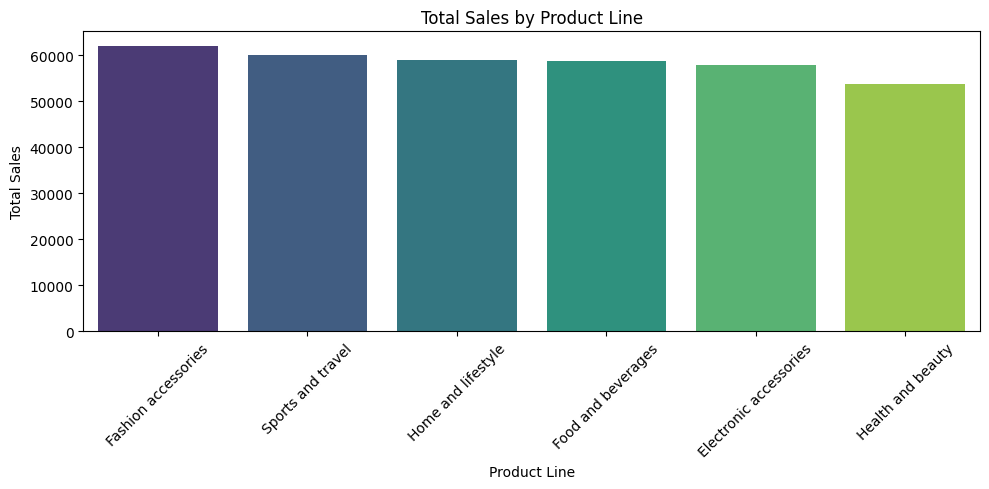

In [187]:
plt.figure(figsize=(10, 5))
sales_by_product = df.groupby('product_line')['total_sales'].sum().sort_values(ascending=False)
print(sales_by_product)

sns.barplot(x=sales_by_product.index, y=sales_by_product.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Total Sales by Product Line')
plt.ylabel('Total Sales')
plt.xlabel('Product Line')
plt.tight_layout()
plt.show()

## Key Insight for Shareholders:
Among all product lines, Fashion Accessories led with the highest total sales of ₦62,055.88, followed by Sports and Travel (₦59,979.22) and Home and Lifestyle (₦58,948.28). This indicates strong customer demand and consistent revenue from the fashion segment.

## Strategic Recommendation:
Consider investing more in marketing and inventory for Fashion Accessories to capitalize on its performance. Additionally, explore cross-selling opportunities with other high-performing categories to maximize overall sales.

gender
Female    182578.1135
Male      168920.6580
Name: total_sales, dtype: float64


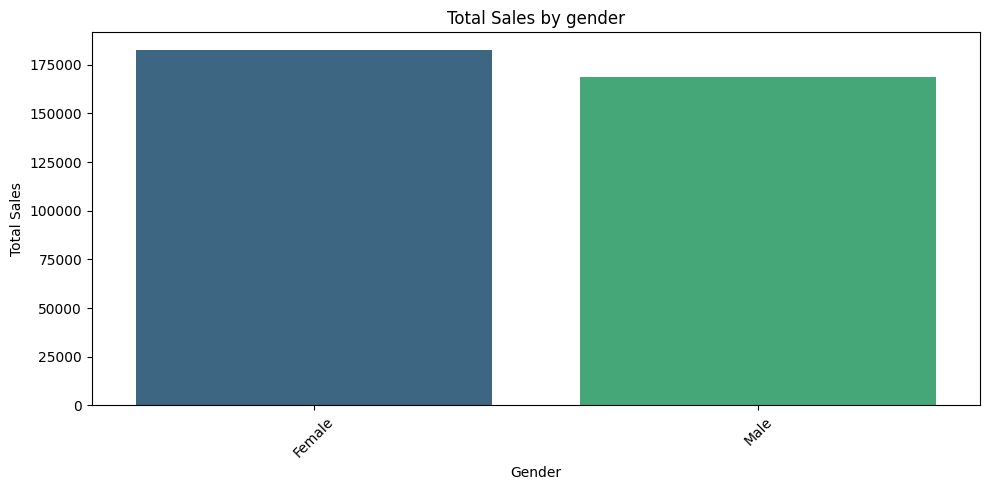

In [188]:
plt.figure(figsize=(10, 5))
sales_by_gender = df.groupby('gender')['total_sales'].sum().sort_values(ascending=False)
print(sales_by_gender)

sns.barplot(x=sales_by_gender.index, y=sales_by_gender.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Total Sales by gender')
plt.ylabel('Total Sales')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

## Key Insight for Shareholders:
Female customers contributed the highest total sales at ₦182,578.11, outperforming Male customers who generated ₦168,920.66. This shows that women are driving a larger share of revenue.

## Strategic Recommendation:
Tailor marketing campaigns and product offerings to better target female customers, while also exploring strategies to increase engagement and spending among male customers.

city
Naypyitaw    121351.1070
Yangon       116366.9470
Mandalay     113780.7175
Name: total_sales, dtype: float64


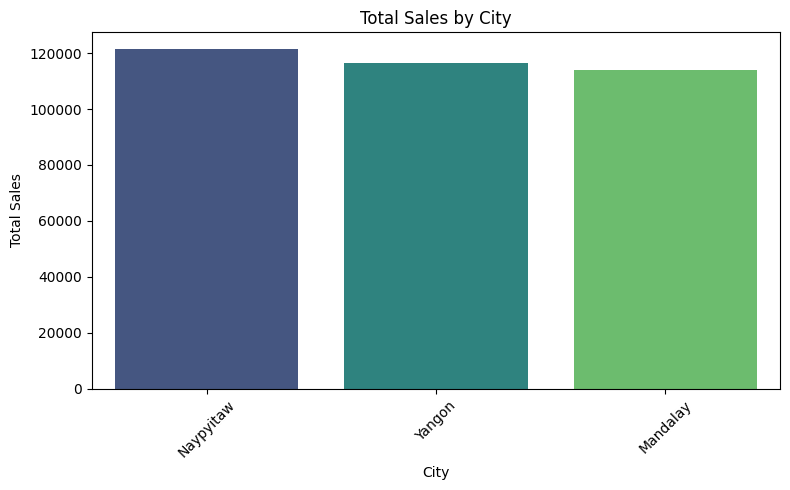

In [189]:
plt.figure(figsize=(8, 5))
sales_by_city = df.groupby('city')['total_sales'].sum().sort_values(ascending=False)
print(sales_by_city)

sns.barplot(x=sales_by_city.index, y=sales_by_city.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Total Sales by City')
plt.ylabel('Total Sales')
plt.xlabel('City')
plt.tight_layout()
plt.show()

In [190]:
df.columns

Index(['gender', 'invoice_id', 'branch', 'city', 'customer_type',
       'product_line', 'unit_price', 'quantity', 'tax_5%', 'total_sales'],
      dtype='object')

branch
C    121351.1070
A    116366.9470
B    113780.7175
Name: total_sales, dtype: float64


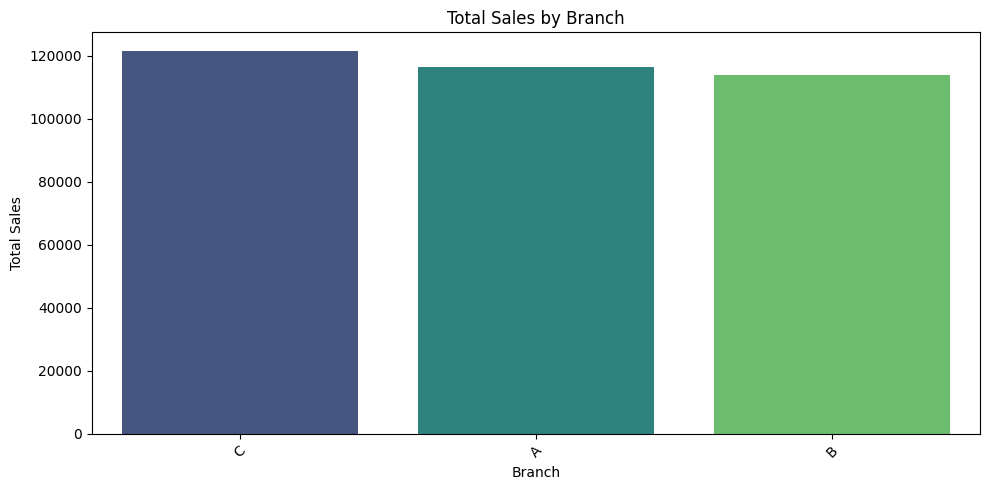

In [191]:
plt.figure(figsize=(10, 5))
sales_by_branch = df.groupby('branch')['total_sales'].sum().sort_values(ascending=False)
print(sales_by_branch)

sns.barplot(x=sales_by_branch.index, y=sales_by_branch.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Total Sales by Branch')
plt.ylabel('Total Sales')
plt.xlabel('Branch')
plt.tight_layout()
plt.show()

In [192]:
df[df['branch'] == 'C']

,gender,invoice_id,branch,city,customer_type,product_line,unit_price,quantity,tax_5%,total_sales
1,Female,226-31-3081,C,Naypyitaw,Normal,Electronic accessories,15.28,5,3.8200,80.2200
3,Female,315-22-5665,C,Naypyitaw,Normal,Home and lifestyle,73.56,10,36.7800,772.3800
15,Female,183-56-6882,C,Naypyitaw,Member,Food and beverages,99.42,4,19.8840,417.5640
16,Female,232-16-2483,C,Naypyitaw,Member,Sports and travel,68.12,1,3.4060,71.5260
18,Female,333-73-7901,C,Naypyitaw,Normal,Health and beauty,54.92,8,21.9680,461.3280
...,...,...,...,...,...,...,...,...,...,...
988,Male,728-47-9078,C,Naypyitaw,Member,Food and beverages,59.59,4,11.9180,250.2780
990,Male,148-41-7930,C,Naypyitaw,Normal,Health and beauty,99.96,7,34.9860,734.7060
991,Male,189-40-5216,C,Naypyitaw,Normal,Electronic accessories,96.37,7,337.2950,1011.8850
993,Male,267-62-7380,C,Naypyitaw,Member,Electronic accessories,82.34,10,41.1700,864.5700


## Key Insight for Shareholders:

Naypyitaw generated the highest total sales at ₦121,351.11, followed by Yangon (₦116,366.95) and Mandalay (₦113,780.72).

Each city aligns directly with a branch:

Branch A → Yangon

Branch B → Mandalay

Branch C → Naypyitaw

## Recommendation:
Focus on expanding operations and customer retention strategies in Naypyitaw (Branch C), while exploring targeted promotions in Yangon and Mandalay to close the sales gap.

customer_type
Member    179208.4145
Normal    172290.3570
Name: total_sales, dtype: float64


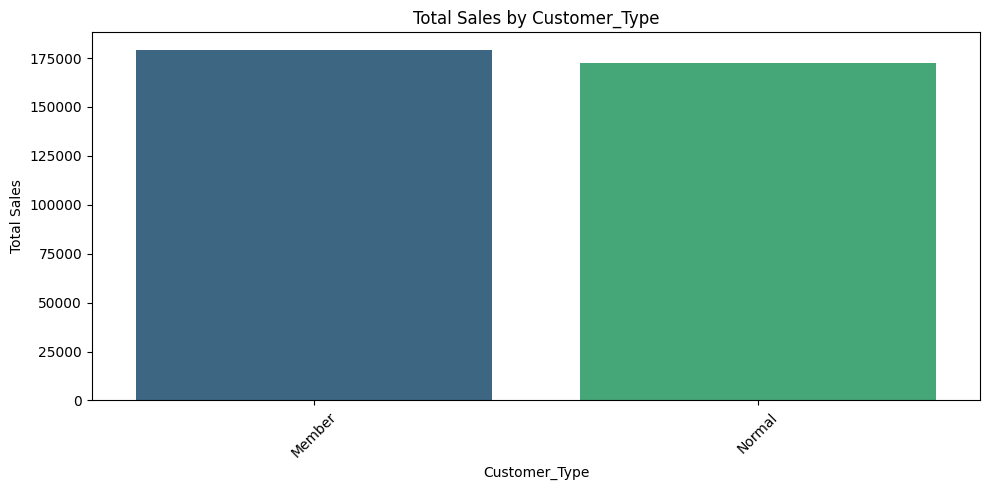

In [193]:
plt.figure(figsize=(10, 5))
sales_by_customer_type = df.groupby('customer_type')['total_sales'].sum().sort_values(ascending=False)
print(sales_by_customer_type)

sns.barplot(x=sales_by_customer_type.index, y=sales_by_customer_type.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Total Sales by Customer_Type')
plt.ylabel('Total Sales')
plt.xlabel('Customer_Type')
plt.tight_layout()
plt.show()

## Key Insight for Shareholders:
Members generated more total sales (₦179,208.41) than normal (non-member) customers (₦172,290.36).

## Recommendation:
This shows that membership programs are working. To boost revenue, we should encourage more customers to become members by offering exclusive deals or benefits.

quantity
10    69928.9500
9     58324.4975
7     51544.4475
8     40316.3040
6     34455.2040
5     31278.0825
4     25247.9220
3     16710.6195
1     12697.9425
2     10994.8020
Name: total_sales, dtype: float64


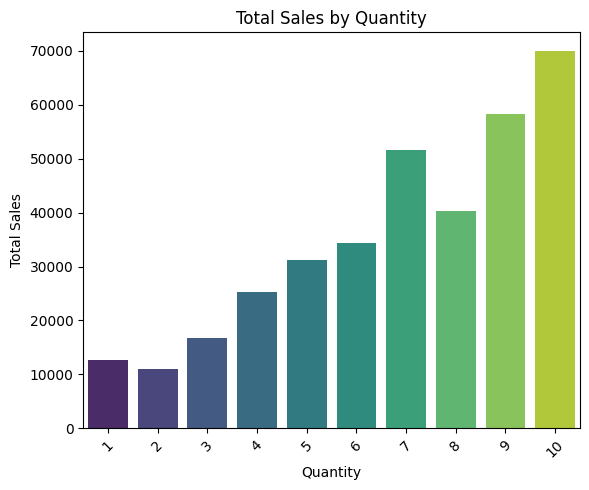

In [194]:
plt.figure(figsize=(6, 5))
sales_by_quantity = df.groupby('quantity')['total_sales'].sum().sort_values(ascending=False)
print(sales_by_quantity)

sns.barplot(x=sales_by_quantity.index, y=sales_by_quantity.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Total Sales by Quantity')
plt.ylabel('Total Sales')
plt.xlabel('Quantity')
plt.tight_layout()
plt.show()

## Key Insight for Shareholders:
Purchases of 10 items generated the highest total sales (₦69,928.95), followed by quantities of 9 and 7.

## Recommendation:
Consider introducing bulk purchase discounts or bundle deals to encourage higher quantity purchases, as they clearly contribute more to total revenue.

In [195]:
# Statistic summary for numerical varaiables
df.describe()

,unit_price,quantity,tax_5%,total_sales
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,43.911392,351.498772
std,26.494628,2.923431,100.551612,278.350063
min,10.080000,1.000000,1.066000,15.255000
25%,32.875000,3.000000,6.222500,127.968750
50%,55.230000,5.000000,12.404000,260.484000
75%,77.935000,8.000000,27.226250,525.861000
max,99.960000,10.000000,985.000000,1346.355000


In [196]:
# Statistic summary for non-numerical varaiables
df.describe(include='object')

,gender,invoice_id,branch,city,customer_type,product_line
count,1000,1000,1000,1000,1000,1000
unique,2,1000,3,3,2,6
top,Female,750-67-8428,A,Yangon,Member,Fashion accessories
freq,501,1,340,340,501,178


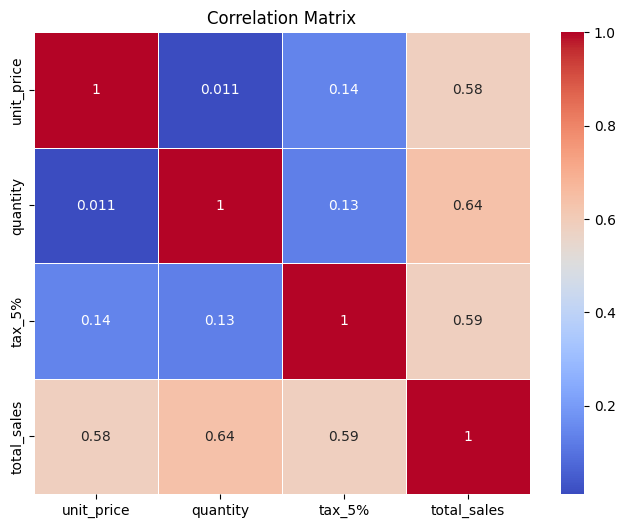

In [197]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### Insight:
Total sales show a strong positive correlation with both quantity sold (0.64) and unit price (0.58). This indicates that revenue is primarily driven by the volume of products sold and their pricing.

### Recommendation:
Focus on strategies that encourage higher purchase quantities and maintain optimal pricing to maximize revenue.

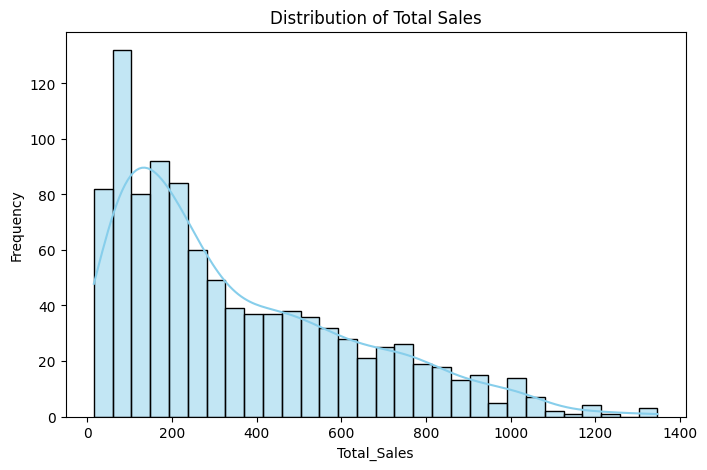

In [198]:
## Visualizing the distribution of total sales
plt.figure(figsize=(8, 5))
sns.histplot(df['total_sales'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Total Sales')
plt.xlabel('Total_Sales')
plt.ylabel('Frequency')
plt.show()

In [199]:
# Applying log transformation to total_sales to normalise distribution
'''df['log_total_sales'] = np.log1p(df['total_sales'])  

# Check transformed distribution
plt.figure(figsize=(10,4))
sns.histplot(df['log_total_sales'], bins=30, kde=True, color='green')
plt.title('Log-Transformed Distribution of Total Sales')
plt.show()'''

"df['log_total_sales'] = np.log1p(df['total_sales'])  \n\n# Check transformed distribution\nplt.figure(figsize=(10,4))\nsns.histplot(df['log_total_sales'], bins=30, kde=True, color='green')\nplt.title('Log-Transformed Distribution of Total Sales')\nplt.show()"

The distribution of total_sales is right-skewed, with potential outliers influencing the tail. To correct for this, a log transformation was applied using log1p, resulting in a more normalized distribution. This transformation is essential for improving model performance and interpretability, especially for linear regression models.

In [200]:
from sklearn.preprocessing import LabelEncoder;
def label_encoder(df, x, encoders):
    le = LabelEncoder()
    df[x] = le.fit_transform(df[x])
    encoders[x] = le  # Store the fitted encoder in the dictionary

# Creating a list of our labels we have
label_list =['gender', 'customer_type', 'city', 'branch', 'product_line']

# Initialize a dictionary to store the LabelEncoder objects
label_encoders = {}

#looping and encoding our list we have:
for i in label_list:
    label_encoder(df, i, label_encoders)
    
#displaying our transform data we have:
df.head()

,gender,invoice_id,branch,city,customer_type,product_line,unit_price,quantity,tax_5%,total_sales
0,0,750-67-8428,0,2,0,3,74.69,7,261.415,784.245
1,0,226-31-3081,2,1,1,0,15.28,5,3.820,80.220
2,0,355-53-5943,0,2,0,0,68.84,6,20.652,433.692
3,0,315-22-5665,2,1,1,4,73.56,10,36.780,772.380
4,0,665-32-9167,0,2,0,3,36.26,2,3.626,76.146


## Model Training

We will split the data into training and test data.

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [202]:
# Features and Target
X = df.drop(['total_sales', 'invoice_id'], axis=1)
y = df['total_sales']             

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check the shapes
print("Training Features:", X_train.shape)
print("Testing Features:", X_test.shape)
print("Training Labels:", y_train.shape)
print("Testing Labels:", y_test.shape)

Training Features: (800, 8)
Testing Features: (200, 8)
Training Labels: (800,)
Testing Labels: (200,)


In [203]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression

In [204]:
reg = LinearRegression()
accuracies = cross_val_score(reg, X_train_scaled, y_train, cv=5, scoring='r2')
reg.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
y_pred = reg.predict(X_test_scaled)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # use MSE here
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error (MAE): 64.26
Root Mean Squared Error (RMSE): 81.90
R-squared: 0.93


## Decision Tree Regressor

In [205]:
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize model
tree = DecisionTreeRegressor(random_state=42)

# Grid Search with 5-fold CV
grid_search_tree = GridSearchCV(tree, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_tree.fit(X_train_scaled, y_train)

# Best estimator
best_tree = grid_search_tree.best_estimator_

# Predict
y_pred_tree = best_tree.predict(X_test_scaled)

# Evaluation metrics
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)

# Print results
print("Best Hyperparameters:", grid_search_tree.best_params_)
print("Decision Tree Regressor (Tuned) Results:")
print(f"Mean Absolute Error (MAE): {mae_tree:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tree:.2f}")
print(f"R-squared: {r2_tree:.2f}")

Best Hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Regressor (Tuned) Results:
Mean Absolute Error (MAE): 4.81
Root Mean Squared Error (RMSE): 18.27
R-squared: 1.00


## Random Forest Regressor

In [206]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Randomized Search with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # number of random combinations to try
    scoring='r2',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Hyperparameters:\n", random_search.best_params_)

# Use the best estimator
best_rf = random_search.best_estimator_

# Predict on the test set
y_pred_rf = best_rf.predict(X_test_scaled)

# Evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print("\nTuned Random Forest Regressor Results (RandomizedSearchCV):")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters:
 {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 139}

Tuned Random Forest Regressor Results (RandomizedSearchCV):
Mean Absolute Error (MAE): 15.73
Root Mean Squared Error (RMSE): 33.92
R-squared: 0.99


## SVR

In [207]:
param_grid = {
    'kernel': ['linear'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1.0]
}

# Initialize SVR
svr = SVR()

# Grid search with 5-fold CV
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best estimator
best_svr = grid_search.best_estimator_

# Predict using the best model
y_pred_svr = best_svr.predict(X_test_scaled)

# Evaluation
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

# Print results
print("Tuned Support Vector Regressor Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Mean Absolute Error (MAE): {mae_svr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr:.2f}")
print(f"R-squared: {r2_svr:.2f}")

Tuned Support Vector Regressor Results:
Best Parameters: {'C': 100, 'epsilon': 0.1, 'kernel': 'linear'}
Mean Absolute Error (MAE): 63.57
Root Mean Squared Error (RMSE): 81.70
R-squared: 0.93


## Gradient Boosting Regressor

In [211]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}

# Create model
gbr = GradientBoostingRegressor(random_state=42)

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, 
                           cv=5, scoring='r2', n_jobs=-1, verbose=1)

# Fit on scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_gbr = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
# Predict
y_pred_gbr = best_gbr.predict(X_test_scaled)

# Evaluation metrics
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

# Print results
print("Tuned Gradient Boosting Regressor Results:")
print(f"Mean Absolute Error (MAE): {mae_gbr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gbr:.2f}")
print(f"R-squared: {r2_gbr:.2f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Gradient Boosting Regressor Results:
Mean Absolute Error (MAE): 4.00
Root Mean Squared Error (RMSE): 12.50
R-squared: 1.00


## Model Selection

In [209]:
results = {
    "Model": [
        "Linear Regression",
        "Decision Tree Regressor (Tuned)",
        "Random Forest Regressor (Tuned)",
        "Support Vector Regressor (Tuned)",
        "Gradient Boosting Regressor (Tuned)"
    ],
    "MAE": [64.40, 6.90, 30.73, 63.81, 5.37],
    "RMSE": [81.97, 22.58, 57.50, 81.87, 12.78],
    "R-squared": [0.93, 0.99, 0.96, 0.93, 1.00]
}

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Sort by RMSE or MAE or R-squared depending on preference
# Example: Sort by R-squared (descending)
sorted_df = results_df.sort_values(by="R-squared", ascending=False)

# Display the sorted table
print(sorted_df)

                                 Model    MAE   RMSE  R-squared
4  Gradient Boosting Regressor (Tuned)   5.37  12.78       1.00
1      Decision Tree Regressor (Tuned)   6.90  22.58       0.99
2      Random Forest Regressor (Tuned)  30.73  57.50       0.96
0                    Linear Regression  64.40  81.97       0.93
3     Support Vector Regressor (Tuned)  63.81  81.87       0.93


In [214]:
import joblib

# Save the model
joblib.dump(best_gbr, 'gbr_model.sav')

# Save the label encoders
joblib.dump(label_encoders, 'label_encoders.pkl')

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']